## **Kaggle Competicion** 
### Store Sales - Time Series Forecasting

In [79]:
# Importamos las librerias 
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
holidays_events = pd.read_csv('./holidays_events.csv')
oil = pd.read_csv('./oil.csv')
sample_submission = pd.read_csv('./sample_submission.csv')
stores = pd.read_csv('./stores.csv')
test = pd.read_csv('./test.csv')
train = pd.read_csv('./train.csv')
transactions = pd.read_csv('./transactions.csv')

### 1. EDA 

* Identificamos por los datos proporcionados y el estudio realizado en los datos, la variable objetivo es "sales", por lo que enfocamos todo el estudio a predecir esta variable lo mejor posible y como todas las variables son capaces de predecir esta.

In [14]:
train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


#### 1.1 Columnas

In [25]:
train.head()


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


The training data, comprising time series of features store_nbr, family, and onpromotion as well as the target sales.
- store_nbr = identifies the store at which the products are sold.
- family = identifies the type of product sold.
- sales = gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in - fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
- onpromotion = gives the total number of items in a product family that were being promoted at a store at a given date.

#### 1.2 Estadísticas Descriptivas:

In [17]:
train.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


1. Venta minima = 0 unidades 
2. Venta maxima =  124,717 unidades
3. La media me dice que se venden 358 unidades por dia
4. El 26% de las ventas se realizaron onpromotion
5. Vemos que tengo una media de 358 unidades  y la mediana (percentil 50%) es de 11 unidades [Se observa una discrepancia entre la media y la mediana de las ventas. Mientras que la media de 358 unidades sugiere un valor promedio relativamente alto, la mediana de 11 unidades indica que la mitad de las observaciones tienen un valor igual o inferior a 11 unidades. Esta discrepancia sugiere una posible presencia de valores extremos o sesgo en la distribución de las ventas]

#### 1.3 Tipos de Datos:

In [22]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


- date es de tipo object (Hay que convertirlo a tipo datetime)
- sales es float, lo que esta bien ya que puede contener decimales
- onpromotion es de tipo entero, pero es binaria, por lo que puede ser mejor pasarlo a tipo booleano

## 2.1 Visualizacion de datos 


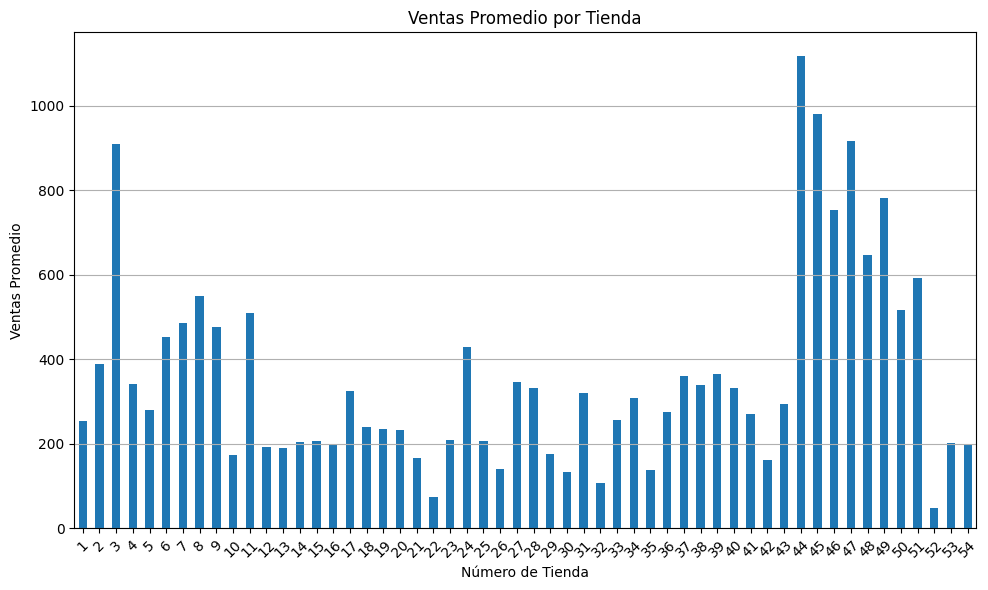

In [32]:
# Calcula las ventas promedio por tienda
ventas_promedio_por_tienda = train.groupby('store_nbr')['sales'].mean()

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
ventas_promedio_por_tienda.plot(kind='bar')
plt.title('Ventas Promedio por Tienda')
plt.xlabel('Número de Tienda')
plt.ylabel('Ventas Promedio')
plt.xticks(rotation=45)
plt.grid(axis='y')  # Añade líneas de referencia horizontal
plt.tight_layout()  # Ajusta la disposición del gráfico
plt.show()

Del gráfico de barras que muestra las ventas promedio por tienda, podrías extraer varias conclusiones y observaciones, como:

- Variabilidad en las Ventas: Observarás que algunas tiendas tienen ventas promedio más altas que otras. Esto puede indicar diferencias en el desempeño de las tiendas o en las estrategias de ventas.

- Identificación de Tiendas Destacadas: Puedes identificar tiendas que sobresalen en términos de ventas promedio. Estas tiendas podrían ser objeto de un análisis más detallado para comprender qué prácticas o factores contribuyen a su éxito.

- Identificación de Tiendas con Bajas Ventas: Del mismo modo, puedes identificar tiendas que tienen ventas promedio más bajas. Estas tiendas podrían requerir una atención especial para mejorar su desempeño.

- Patrones de Ventas por Tienda: Puedes observar patrones o tendencias en las ventas promedio a lo largo de las tiendas. Por ejemplo, algunas tiendas podrían tener ventas consistentemente altas o bajas, mientras que otras podrían mostrar fluctuaciones estacionales o tendencias a lo largo del tiempo.

- Comparación con Metas o Expectativas: Puedes comparar las ventas promedio de cada tienda con metas o expectativas previamente establecidas para evaluar su desempeño en relación con los objetivos de ventas.

#### Visualizar las Ventas a lo Largo del Tiempo:

In [33]:
# Convierte la columna 'date' a tipo datetime si no está en ese formato
train['date'] = pd.to_datetime(train['date'])

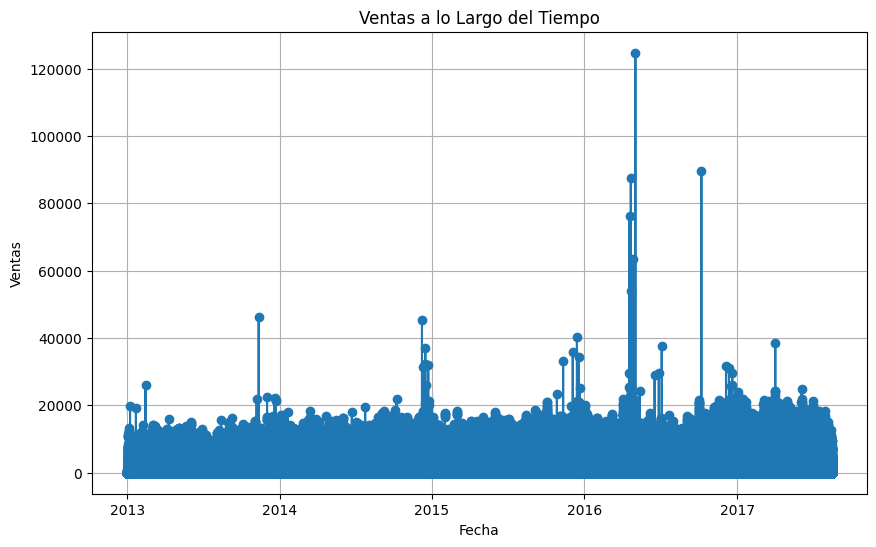

In [37]:
# Crea un gráfico de líneas para visualizar las ventas a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(train['date'], train['sales'], marker='o', linestyle='-')
plt.title('Ventas a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

### Gráfico de Dispersión para Explorar Relaciones entre Variables:

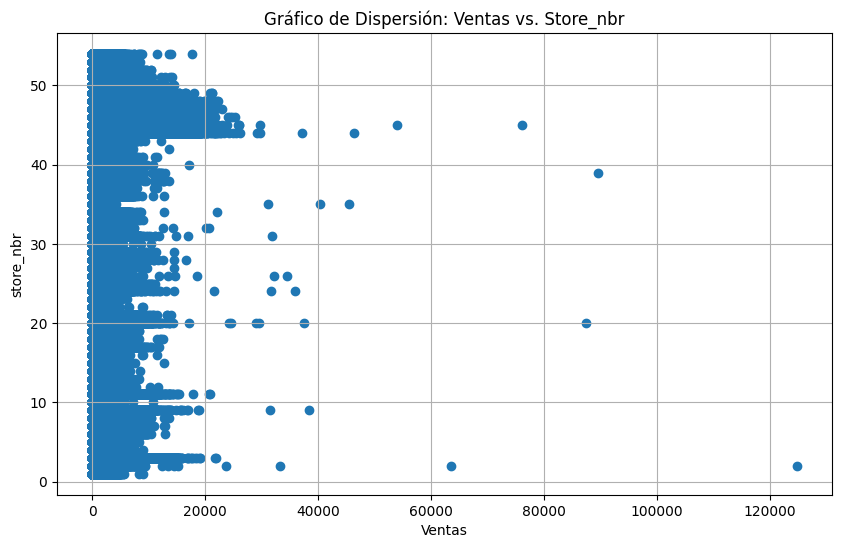

In [46]:
# Crea un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(train['sales'], train['store_nbr'])
plt.title('Gráfico de Dispersión: Ventas vs. Store_nbr')
plt.xlabel('Ventas')
plt.ylabel('store_nbr')
plt.grid(True)
plt.show()

- Concentración de datos: Hay una gran concentración de puntos alrededor del eje y, lo que sugiere que hay muchas tiendas con un número bajo de ventas.

- Outliers: Hay algunos puntos dispersos hacia la derecha del gráfico que representan tiendas con ventas significativamente más altas que el resto.

- Rango de ventas: Las ventas varían desde muy pequeñas hasta más de 120,000 unidades, con la mayoría de las tiendas agrupadas en el rango más bajo.

- Número de tiendas: El número de tienda parece estar asignado en un rango de 1 a aproximadamente 54.

- Distribución de ventas por tienda: No hay una tendencia clara o patrón que relacione el número de la tienda con las ventas. Esto puede indicar que el número de tienda no es un factor que afecte directamente las ventas.

- Posibles grupos de tiendas: Puede haber grupos de tiendas con desempeños similares en ventas, como se ve por la aparición de "líneas horizontales" de puntos a ciertos niveles de ventas.

- Ausencia de correlación lineal: No parece haber una correlación lineal entre las ventas y el número de tienda. Si el número de tienda representara algo como la antigüedad o el tamaño, no se ve una relación directa con el volumen de ventas.

### Matriz de Correlacion

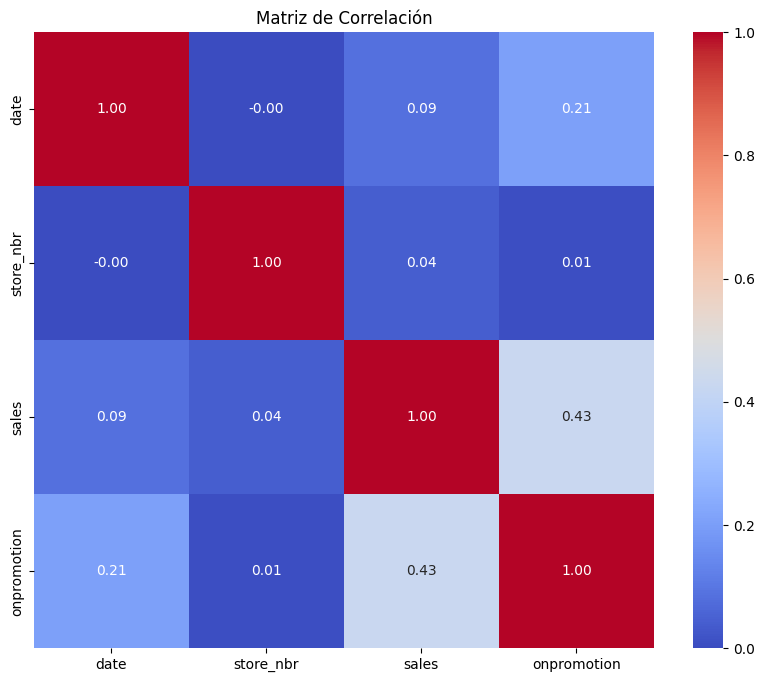

In [51]:
# Selecciona solo las columnas 'store_nbr', 'sales' y 'onpromotion'
selected_columns = train[['date','store_nbr', 'sales', 'onpromotion']]

# Calcula la matriz de correlación
correlation_matrix = selected_columns.corr()

# Crea un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

- La presencia de una correlación moderada entre 'sales' y 'onpromotion' no significa que 'onpromotion' sea un predictor perfecto de 'sales', pero sí sugiere que podría haber algún tipo de relación. Las otras variables, como 'store_nbr', que muestran correlaciones bajas con 'sales', podrían no ser predictores útiles por sí solas. Sin embargo, esto no significa que sean completamente irrelevantes; podrían influir en las ventas en combinación con otras variables o en ciertos contextos que una matriz de correlación no puede capturar. Por ejemplo, podría ser que ciertos números de tiendas correspondan a ubicaciones específicas con patrones de ventas únicos que una correlación no revela directamente.

## 3.1 Identificación de Valores Atípicos:

#### Histogramas 

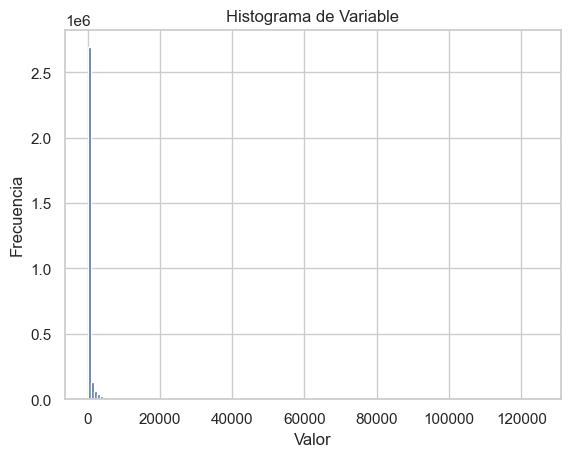

In [65]:
plt.hist(train['sales'], bins=150)  # Ajusta el número de bins según tus datos
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de Variable')
plt.show()

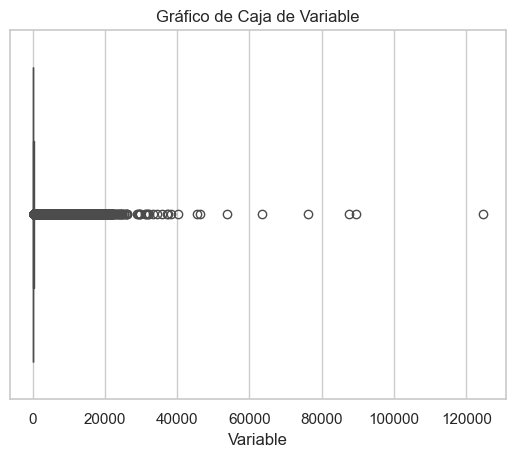

In [67]:
sns.boxplot(x=train['sales'])
plt.xlabel('Variable')
plt.title('Gráfico de Caja de Variable')
plt.show()

## 4.1 Tratamiento de valores atipicos

In [73]:
# Calcula el primer y tercer cuartil (Q1 y Q3)
Q1 = train['sales'].quantile(0.25)
Q3 = train['sales'].quantile(0.75)

# Calcula el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Define los límites superior e inferior para identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtra los valores atípicos y crea un nuevo DataFrame sin ellos
train_without_outliers = train[(train['sales'] >= lower_bound) & (train['sales'] <= upper_bound)]
train_without_outliers.describe()

,id,date,store_nbr,sales,onpromotion
count,2.553783e+06,2553783,2.553783e+06,2.553783e+06,2.553783e+06
mean,1.472429e+06,2015-04-08 14:22:29.370403840,2.732917e+01,5.874689e+01,8.232571e-01
min,0.000000e+00,2013-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.159535e+05,2014-02-07 00:00:00,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.457348e+06,2015-03-31 00:00:00,2.700000e+01,5.000000e+00,0.000000e+00
75%,2.223852e+06,2016-06-04 00:00:00,4.000000e+01,6.108500e+01,0.000000e+00
max,3.000887e+06,2017-08-15 00:00:00,5.400000e+01,4.896150e+02,2.790000e+02
std,8.682923e+05,NaN,1.537488e+01,1.065165e+02,4.448644e+00


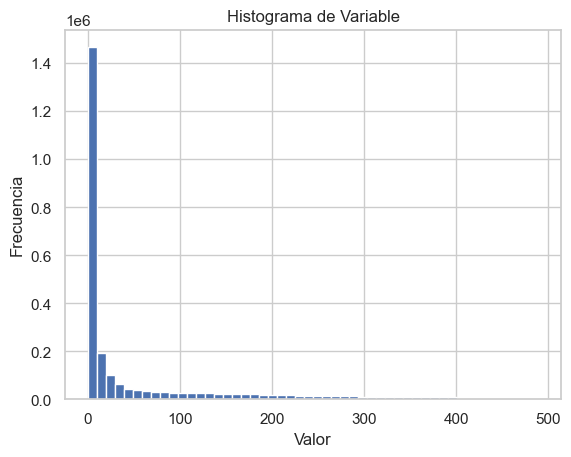

In [76]:
plt.hist(train_without_outliers['sales'], bins=50)  # Ajusta el número de bins según tus datos
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de Variable')
plt.show()

## 4.2 Tratamiento de Datos Faltantes:

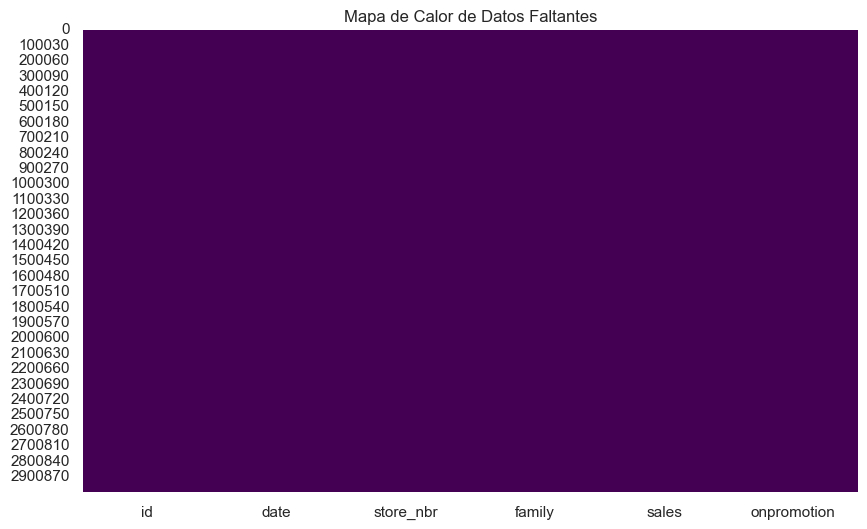

In [80]:
# Crea un mapa de calor para visualizar los datos faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Datos Faltantes')
plt.show()

In [83]:
# Calcula la cantidad de valores faltantes en cada columna
missing_count = train.isnull().sum()

# Calcula el porcentaje de valores faltantes en cada columna
missing_percentage = (missing_count / len(train)) * 100

# Combina los resultados en un DataFrame para facilitar la visualización
missing_info = pd.DataFrame({'Cantidad Faltante': missing_count, 'Porcentaje Faltante': missing_percentage})
print(missing_info)


             Cantidad Faltante  Porcentaje Faltante
id                           0                  0.0
date                         0                  0.0
store_nbr                    0                  0.0
family                       0                  0.0
sales                        0                  0.0
onpromotion                  0                  0.0
